<a href="https://colab.research.google.com/github/melihkurtaran/DNA_hackathon/blob/template_matching/MainCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!pip install gif2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for gif2numpy: filename=gif2numpy-1.3-py2.py3-none-any.whl size=8392 sha256=91f2f3d6606ad6eee2fb1b2e867fa5d877ef11194357f61ecf22c9253c71b85d
  Stored in directory: /root/.cache/pip/wheels/7d/70/75/7e42205c427015e223944d47ea89e01dc779fb49ba664fb743
Successfully built gif2numpy


In [3]:
!unzip /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba.zip -d /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/ba/20220123/aemet_ba_202201230640.gif  
  inflating: /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/__MACOSX/ba/20220123/._aemet_ba_202201230640.gif  
  inflating: /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/ba/20220123/aemet_ba_202201230720.gif  
  inflating: /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/__MACOSX/ba/20220123/._aemet_ba_202201230720.gif  
  inflating: /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/ba/20220123/aemet_ba_202201231600.gif  
  inflating: /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/__MACOSX/ba/20220123/._aemet_ba_202201231600.gif  
  inflating: /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/ba/20220123/aemet_ba_202201230250.gif  
  inflating: /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/__MACOSX/ba/20220123/._aemet

In [4]:
import gif2numpy
import cv2
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image,ImageDraw
import os
%matplotlib inline
import numpy as np

In [21]:
data_path = '/content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/'
data = {}
for state in os.listdir(data_path):
  if state[0] =='.' or state[0]=='_':
    continue
  data[state] = {}
  for i in os.listdir(os.path.join(data_path,state)):
    if i[0] =='.' or i[0]=='_':
      continue
    a = i[4:6]
    if i[4:6] not in data[state]:
      data[state][a] = []
    for im in os.listdir(os.path.join(data_path,state, i)):
      if i[0] =='.' or i[0]=='_':
        continue
      data[state][a].append(os.path.join(data_path,state,i,im))

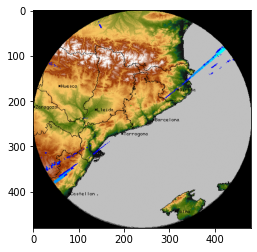

In [98]:

np_frames, extensions, image_specifications = gif2numpy.convert("/content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/ba/20220101/aemet_ba_202201010000.gif")
the_frame = np.array(np_frames[0])
h=the_frame.shape[0]
w=the_frame.shape[1]

the_frame =  the_frame[:w,:,:]
the_frame = cv2.cvtColor(the_frame, cv2.COLOR_BGR2RGB)
the_frame_pil = Image.fromarray(the_frame)
alpha = Image.new('L', (the_frame.shape[0],the_frame.shape[1]),0)
draw = ImageDraw.Draw(alpha)
draw.pieslice([0,0,w,w],0,360, fill=255)
npAlpha=np.array(alpha)
npAlpha=np.stack([npAlpha,npAlpha,npAlpha],axis=2)


# the_frame=np.dstack((the_frame,npAlpha))
the_frame = (the_frame/255) * (npAlpha/255)
# the_frame=the_frame*255
i1 = np.where(0, 1, the_frame)

imshow(i1)

# i = np.clip(the_frame, 0, 1)
# i = i.sum(axis=-1)
# i1 = i/i.max()

# # i1 = np.where(1.0, 0, i)
# # i[:,:,2]=i[:,:,2]*0
# i1 = i1 < 0.8
# imshow(i1)
# print(i1.shape)
# print(i1.max())
# print(i1.min())

# imshow(np.uint8(the_frame))

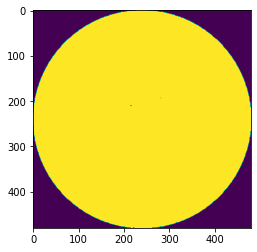

In [73]:
imshow(i[:,:,2])

array(<matplotlib.image.AxesImage object at 0x7f22aa35fa30>, dtype=object)

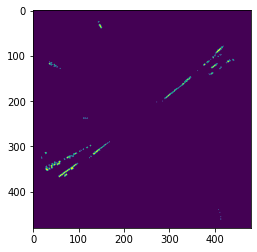

In [28]:
hsv = cv2.cvtColor(the_frame, cv2.COLOR_RGB2HSV)
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

mask = cv2.inRange(hsv, lower_blue, upper_blue)
imshow(mask)
  

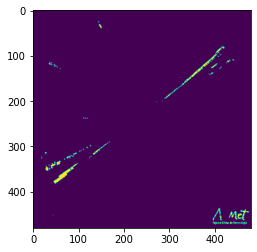

In [38]:
hsv = cv2.cvtColor(the_frame, cv2.COLOR_RGB2HSV)
lower_blue = np.array([94,58,96])
upper_blue = np.array([130,255,255])
# hsv(194, 58%, 96%)
mask = cv2.inRange(hsv, lower_blue, upper_blue)
imshow(mask)
  